# Titanic - Kaggle - 07252016

In [79]:
# By Lily Elizabeth John

###### Kaggle Competition - Beginner

######  
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


###### Dataset : train.csv and test.csv

###### 

VARIABLE DESCRIPTIONS:

survival        Survival
                (0 = No; 1 = Yes)
                
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)

name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent:   Mother or Father of Passenger Aboard Titanic

Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [80]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
# Read in training dataset
df=pd.read_csv('train.csv')

In [82]:
# View first 5 rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
#View info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [84]:
#Describe data
df.describe()

C:\Users\lilye\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### Observations and futher analysis ideas

# Observations
Cabin field has several missing data points
The first letter of cabin datapoint is the cabin level info

Age has several missing data points 
Embarked has 2 missing data points

We cannot delete datapoints that have missing values as Cabin has only 204 valid data points

# Analysis Ideas

1) Plot Pclass against survived to see relationship

2) Plot Sex against survived to see relationship

3) Plot Age against survived to see relationship - Use only non null datapoints

4) Plot embarked against survived

5) Recode age and Sex into Male Female and Child


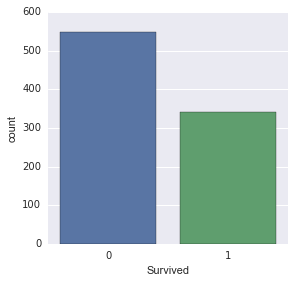

In [85]:
#Visualize target variable
sns.factorplot(x="Survived",data=df,kind="count")

In [86]:
# Fewer people survived in the disaster

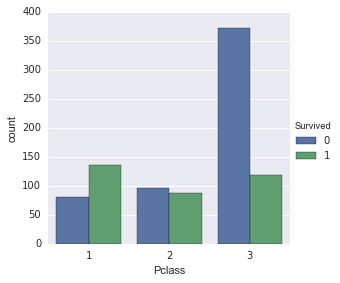

In [87]:
#1) Plot Pclass against survived to see relationship
sns.factorplot(x="Pclass",data=df,kind="count",hue="Survived")

In [88]:
#Pclass 1 had the highest survival rate
#Pclass 1 had more number of survivors than non survivors.
#Other classes had a higher number of non survivors
#Clearly there is a relationship between Pclass and Survived

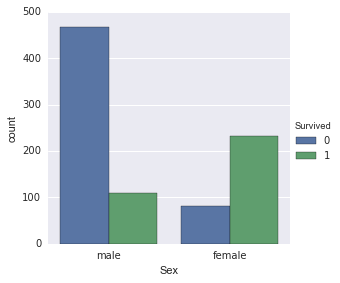

In [89]:
#2) Plot Sex against survived to see relationship
sns.factorplot(x="Sex",data=df,hue="Survived",kind="count")

In [90]:
# Clearly a high percentage of females survived than males

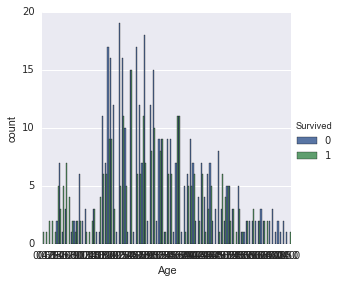

In [91]:
#3) Plot Age against survived to see relationship - Use only non null datapoints
sns.factorplot(x="Age",data=df,hue="Survived",kind="count")
#Improve upon plot -------------------------------------------------------------------------To do

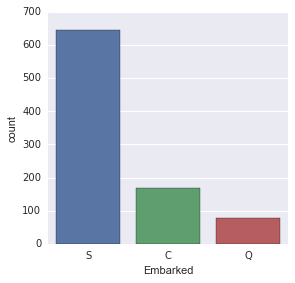

In [92]:
#4) Plot embarked against survived
sns.factorplot(x="Embarked",data=df,kind="count")

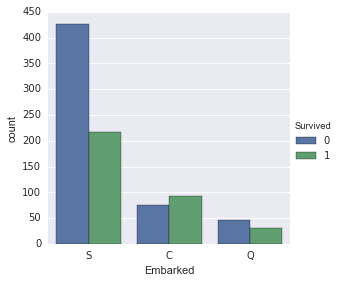

In [93]:
sns.factorplot(x="Embarked",data=df,hue="Survived",kind="count")

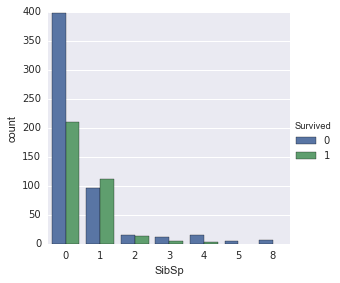

In [94]:
#Plot Survived against SibSp

sns.factorplot(x="SibSp",data=df,hue="Survived",kind="count")

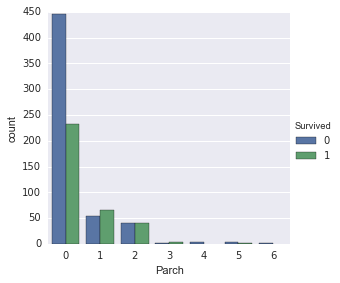

In [95]:
#Plot Survived against Parch
sns.factorplot(x="Parch",data=df,hue="Survived",kind="count")

In [96]:
#Cabin - Get first letter

In [97]:
#Recode variables into 1s and 0s
# Build Logistic Regression models with different variable selection

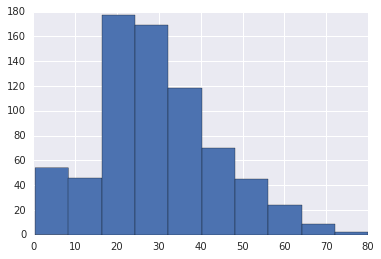

In [98]:
df['Age'].hist()

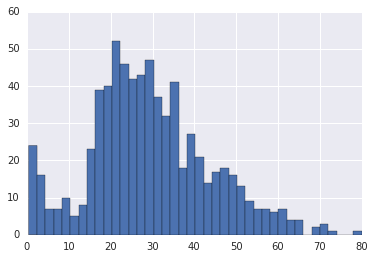

In [99]:
df['Age'].hist(bins=40)

In [100]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64